In [12]:
import pandas as pd

df_issue_scores = pd.read_csv('data/issue_scores.csv')
df_pr_scores = pd.read_csv('data/pr_scores.csv')

In [13]:

# Define the mapping of old names to the new name
column_mapping = {
    'Additional Context and Supporting Information': 'Supporting Information',
    'Related Issues and References': 'References',
    'Severity and Impact Assessment': 'Impact Assessment',
    'Log/Debugging Information': 'Debugging Information',
}

# Rename the columns based on the mapping
df_issue_scores.rename(columns=column_mapping, inplace=True)

# Print the updated DataFrame with the renamed columns
# save to csv
df_issue_scores.to_csv('data/issue_scores.csv', index=False)

In [14]:


# Define the mapping of old names to the new name
column_mapping = {
    'Additional Context and Supporting Information': 'Supporting Information',
    'Related Issues and References': 'References',
    'Severity and Impact Assessment': 'Impact Assessment',
    'Log/Debugging Information': 'Debugging Information',
}

# Rename the columns based on the mapping
df_pr_scores.rename(columns=column_mapping, inplace=True)

# Print the updated DataFrame with the renamed columns
# save to csv
df_pr_scores.to_csv('data/pr_scores.csv', index=False)

In [41]:
# remove 'Supporting Information', 'References' columns
df_issue_scores.drop(['Supporting Information', 'References'], axis=1, inplace=True)
df_pr_scores.drop(['Supporting Information', 'References'], axis=1, inplace=True)

In [42]:
df_pr_scores.columns

Index(['Summary', 'repo_name', 'pr_file', 'Additional context',
       'Steps to reproduce', 'Related issues', 'Screenshot',
       'Expected/Actual behavior', 'Type', 'Environment', 'Log', 'Severity',
       'Documentation and Testing', 'repo_name.1', 'pr_file.1',
       'Collaboration and Review', 'Submission Guidelines and Formatting',
       'Issue/Problem Description', 'Debugging Information',
       'Greeting and Introduction', 'Proposed Solutions and Suggestions',
       'Impact Assessment', 'Higher-level Category'],
      dtype='object')

In [2]:
df_issue_scores.columns

Index(['Related issues', 'repo_name', 'issue_file', 'Additional context',
       'Steps to reproduce', 'Expected/Actual behavior', 'Type', 'Screenshot',
       'Log', 'Summary', 'Severity', 'Environment',
       'Documentation and Testing', 'repo_name.1', 'issue_file.1',
       'Additional Context and Supporting Information',
       'Issue/Problem Description', 'Proposed Solutions and Suggestions',
       'Related Issues and References', 'Severity and Impact Assessment',
       'Submission Guidelines and Formatting', 'Collaboration and Review',
       'Log/Debugging Information', 'Greeting and Introduction'],
      dtype='object')

In [54]:
# get mean of every column

mean_issue_scores = df_issue_scores.mean(axis=0) * 100
print(mean_issue_scores)

Related issues                          18.581406
Additional context                      20.673790
Steps to reproduce                      17.256374
Expected/Actual behavior                 9.926884
Type                                     7.951364
Screenshot                               5.914838
Log                                      4.712445
Summary                                  7.267429
Severity                                 3.486450
Environment                              4.229020
Documentation and Testing                5.678349
Issue/Problem Description               19.638139
Proposed Solutions and Suggestions      12.175001
Impact Assessment                        4.727414
Submission Guidelines and Formatting     5.142337
Collaboration and Review                 5.844103
Debugging Information                    7.091120
Greeting and Introduction                4.499977
dtype: float64


/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/1518694088.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_issue_scores = df_issue_scores.mean(axis=0) * 100


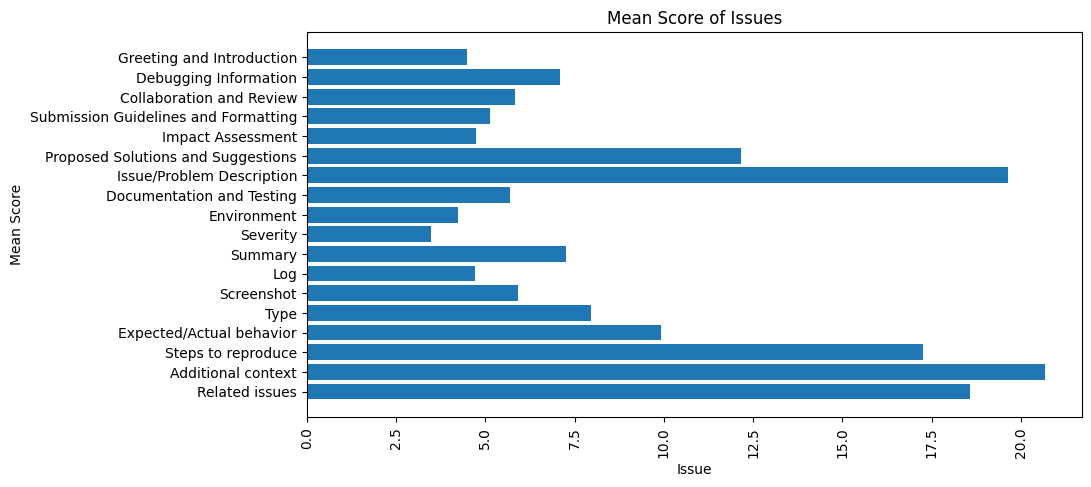

In [44]:
# a horizontal bar plot for the mean scores of the issues
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(mean_issue_scores.index, mean_issue_scores.values)
plt.xticks(rotation=90)
plt.ylabel('Mean Score')
plt.xlabel('Issue')
plt.title('Mean Score of Issues')
plt.show()

/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/3735730967.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_pr_scores = df_pr_scores.mean(axis=0) * 100
/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/3735730967.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_issue_scores = df_issue_scores.mean(axis=0) * 100


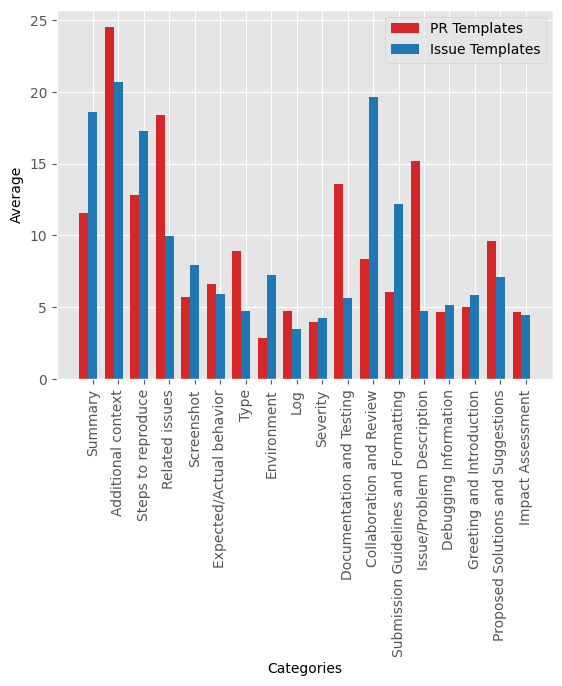

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the top 10 issue templates
plt.style.use('ggplot')
# change font style 
plt.rcParams['font.family'] = 'sans-serif'
# Calculate the mean scores
mean_pr_scores = df_pr_scores.mean(axis=0) * 100
mean_issue_scores = df_issue_scores.mean(axis=0) * 100

# Define the column names
column_names = ['Summary', 'Additional context', 'Steps to reproduce',
                'Related issues', 'Screenshot', 'Expected/Actual behavior', 'Type', 'Environment',
                'Log', 'Severity', 'Documentation and Testing',
                'Collaboration and Review', 'Submission Guidelines and Formatting',
                'Issue/Problem Description', 'Debugging Information', 'Greeting and Introduction',
                'Proposed Solutions and Suggestions', 'Impact Assessment']

# Create a numpy array for the mean scores
pr_scores_np = np.array(mean_pr_scores)
issue_scores_np = np.array(mean_issue_scores)

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot the vertical bar graphs side by side
bar_width = 0.35
index = np.arange(len(column_names))
ax.bar(index, pr_scores_np, bar_width, label='PR Templates', color='tab:red')
ax.bar(index + bar_width, issue_scores_np, bar_width, label='Issue Templates', color='tab:blue')

# give some space between one category to another

# Customize the plot
ax.set_ylabel('Average')
ax.set_xticks(index + bar_width *2  / 2)
ax.set_xticklabels(column_names, rotation='vertical')
ax.set_xlabel('Categories')
ax.legend(loc='best')


# Show the plot
plt.show()


In [53]:
mean_pr_scores = df_pr_scores.mean(axis=0) * 100
print(mean_pr_scores)

Summary                                 11.551874
Additional context                      24.482078
Steps to reproduce                      12.812169
Related issues                          18.350389
Screenshot                               5.695020
Expected/Actual behavior                 6.590542
Type                                     8.913374
Environment                              2.857222
Log                                      4.750893
Severity                                 3.996439
Documentation and Testing               13.607567
Collaboration and Review                 8.331628
Submission Guidelines and Formatting     6.096200
Issue/Problem Description               15.162385
Debugging Information                    4.671558
Greeting and Introduction                5.025954
Proposed Solutions and Suggestions       9.603613
Impact Assessment                        4.670882
dtype: float64


/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/906453537.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_pr_scores = df_pr_scores.mean(axis=0) * 100


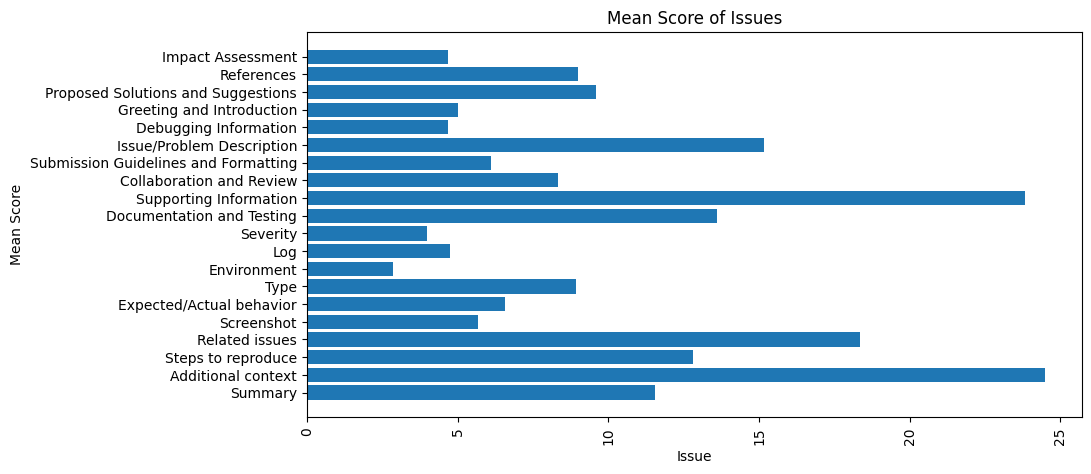

In [23]:
# a horizontal bar plot for the mean scores of the issues
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(mean_pr_scores.index, mean_pr_scores.values)
plt.xticks(rotation=90)
plt.ylabel('Mean Score')
plt.xlabel('Issue')
plt.title('Mean Score of Issues')
plt.show()

In [65]:

import matplotlib.pyplot as plt
import numpy as np

column_categories = {
    'Greeting and Introduction': ['Greeting and Introduction'],
    'Explaining project guidelines': ['Documentation and Testing', 'Submission Guidelines and Formatting', 'Collaboration and Review'],
    'Collecting relevant information': ['Related issues', 'Additional context', 'Steps to reproduce', 'Expected/Actual behavior',
                                        'Type', 'Screenshot', 'Log', 'Summary', 'Severity', 'Environment',
                                        'Additional Context', 'Issue/Problem Description',
                                        'Proposed Solutions and Suggestions', 'Related Issues',
                                        'Impact Assessment']
}

# Calculate the mean scores
mean_pr_scores = df_pr_scores.mean(axis=0) * 100
mean_issue_scores = df_issue_scores.mean(axis=0) * 100
column_categories_scores_issue = {}
column_categories_scores_pr = {}

for i in column_categories:
    column_categories[i] = [x for x in column_categories[i] if x in mean_pr_scores.index]
    column_categories_scores_issue[i] = sum(mean_pr_scores[column_categories[i]]) / len(column_categories[i])
    
print('\n')
print('Issue Templates')
for i in column_categories:
    column_categories[i] = [x for x in column_categories[i] if x in mean_issue_scores.index]
    column_categories_scores_pr[i] = sum(mean_issue_scores[column_categories[i]]) / len(column_categories[i])
    
    
    
print(column_categories_scores_issue)
print('\n')
print('PR Templates')
print(column_categories_scores_pr)



Issue Templates
{'Greeting and Introduction': 502.5953842988487, 'Explaining project guidelines': 934.513176065614, 'Collecting relevant information': 995.6683074210569}


PR Templates
{'Greeting and Introduction': 4.49997652834681, 'Explaining project guidelines': 5.554929462605023, 'Collecting relevant information': 10.50311953557889}


/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/1604821457.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_pr_scores = df_pr_scores.mean(axis=0) * 100
/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_44905/1604821457.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_issue_scores = df_issue_scores.mean(axis=0) * 100


In [66]:
# Calculate the total sum of scores for each category
total_scores_issue = sum(column_categories_scores_issue.values())
total_scores_pr = sum(column_categories_scores_pr.values())

# Calculate the percentage for each category
percentage_issue = {category: (score / total_scores_issue) * 100 for category, score in column_categories_scores_issue.items()}
percentage_pr = {category: (score / total_scores_pr) * 100 for category, score in column_categories_scores_pr.items()}

# Print the percentage for each category
print('Issue Templates - Percentage:')
for category, percentage in percentage_issue.items():
    print(f'{category}: {percentage:.2f}%')

print('\nPR Templates - Percentage:')
for category, percentage in percentage_pr.items():
    print(f'{category}: {percentage:.2f}%')

Issue Templates - Percentage:
Greeting and Introduction: 20.66%
Explaining project guidelines: 38.41%

PR Templates - Percentage:
Greeting and Introduction: 21.89%
Explaining project guidelines: 27.02%


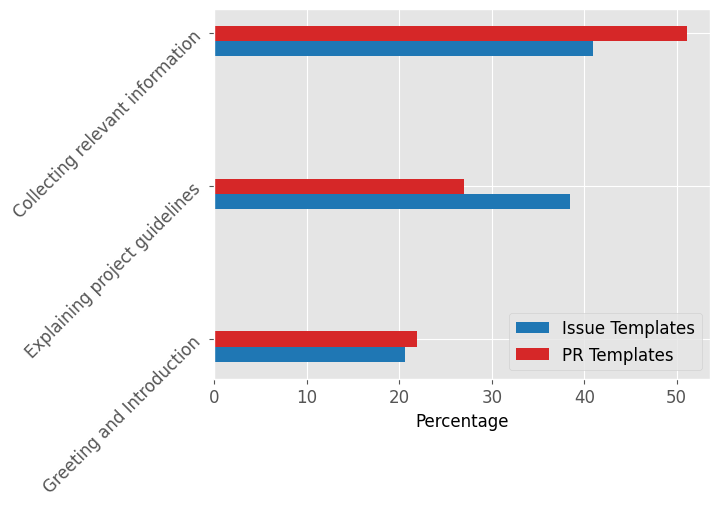

In [96]:
# Prepare the data
categories = list(column_categories.keys())
issue_percentages = [percentage_issue[category] for category in categories]
pr_percentages = [percentage_pr[category] for category in categories]

# Plot the horizontal bar graph
bar_width = 0.10 # Adjust the value to reduce the gap between bars
index = np.arange(len(categories))

plt.barh(index, issue_percentages, bar_width, color='tab:blue', label='Issue Templates')
plt.barh(index + bar_width, pr_percentages, bar_width, color='tab:red', label='PR Templates')
# Set the y-axis labels
plt.yticks(index + bar_width, categories)
# Set the x-axis label
plt.xlabel('Percentage')

# rotate the categories to 45 degree
plt.yticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()
